In [4]:
# 导入相关库
import numpy as np
import pandas as pd
import pytz
import rqdatac
import datetime as dt
import matplotlib.pyplot as plt

start_date = "20180101"
end_date = dt.datetime.now(pytz.timezone("Asia/Shanghai")).strftime("%Y%m%d")

rqdatac.init()
futures_codes = [
    'cu', 'al', 'zn', 'pb', 'ni', 'sn', 'au', 'ag', 'rb', 'hc', 'fu', 'bu', 'ru', 'sc', 'nr', 'sp', 'ss', 'lu', 'bc', 'ao', 'br', 'ec', 'si', 'lc',
    'c', 'cs', 'a', 'b', 'm', 'y', 'p', 'fb', 'bb', 'jd', 'l', 'v', 'pp', 'j', 'jm', 'i', 'eg', 'rr', 'eb', 'pg', 'lh',
    'cf', 'sr', 'ta', 'oi', 'ri', 'ma', 'me', 'fg', 'rs', 'rm', 'zc', 'jr', 'lr', 'sf', 'sm', 'wt', 'tc', 'gn', 'ro', 'er', 'srx', 'sry', 'wsx', 'wsy', 'cy', 'ap', 'ur', 'cj', 'sa', 'pk', 'pf', 'px',
    'if', 'ic', 'im', 'ih', 't', 'tf', 'ts', 'tl'
]

futures_ticker = [ticker.upper()for ticker in futures_codes]

rqdatac.init()

d:\gitrepo\FICC_QIS\venv\Lib\site-packages\rqdatac\client.py:218: UserWarning: rqdatac is already inited. Settings will be changed.
  warnings.warn("rqdatac is already inited. Settings will be changed.", stacklevel=0)
d:\gitrepo\FICC_QIS\venv\Lib\site-packages\rqdatac\client.py:257: UserWarning: Your account will be expired after  28 days. Please call us at 0755-22676337 to upgrade or purchase or renew your contract.
  warnings.warn("Your account will be expired after  {} days. "


In [6]:
price_data = {}
for symbol in futures_ticker:
    price_df = rqdatac.futures.get_dominant_price(
        underlying_symbols=symbol,
        start_date=start_date,
        end_date=end_date,
        frequency="1d",
        fields=None,
        adjust_type="pre",
        adjust_method="prev_close_spread",
    )
    if price_df is None:
        continue
    prices = (price_df["open"] + price_df["close"] + price_df["high"] + price_df["low"]) / 4
    price_data[symbol] = prices.droplevel(level=0)

price_df = pd.DataFrame(price_data)
price_df

,CU,AL,ZN,PB,NI,SN,AU,AG,RB,HC,...,PF,PX,IF,IC,IM,IH,T,TF,TS,TL
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,52752.5,13072.50,17103.75,14250.00,35280.0,101792.5,326.4300,4772.50,1688.75,1531.75,...,NaN,NaN,3289.05,3335.30,NaN,2484.40,83.84000,90.09000,NaN,NaN
2018-01-03,52435.0,12952.50,17105.00,14418.75,35520.0,101765.0,327.2425,4779.50,1688.75,1539.50,...,NaN,NaN,3331.10,3391.90,NaN,2515.55,83.57875,89.94375,NaN,NaN
2018-01-04,52412.5,12918.75,17093.75,14542.50,34920.0,101375.0,326.5050,4765.25,1663.50,1511.00,...,NaN,NaN,3341.05,3413.30,NaN,2517.25,83.37000,89.87375,NaN,NaN
2018-01-05,52527.5,12951.25,17266.25,14617.50,35257.5,101532.5,326.4925,4763.00,1649.25,1489.25,...,NaN,NaN,3353.40,3425.60,NaN,2524.00,83.41125,89.91125,NaN,NaN
2018-01-08,52005.0,12858.75,17248.75,14616.25,34485.0,101257.5,326.8800,4765.00,1641.50,1476.50,...,NaN,NaN,3366.00,3434.40,NaN,2535.85,83.48000,89.98125,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17,76390.0,20443.75,23970.00,16697.50,128585.0,248990.0,641.1400,7853.50,3349.00,3463.75,...,7179.5,7521.0,3801.80,5535.45,5782.45,2577.05,109.21250,106.52875,102.8185,120.3450
2025-01-20,75860.0,20462.50,24222.50,16737.50,128080.0,248795.0,639.2300,7779.00,3364.00,3477.25,...,7109.0,7448.5,3835.15,5610.10,5862.70,2596.60,109.03375,106.46500,102.7870,119.8200
2025-01-21,75507.5,20430.00,24242.50,16755.00,127657.5,250452.5,638.0500,7755.25,3359.75,3471.00,...,7112.0,7410.0,3838.40,5609.85,5864.55,2591.75,109.12625,106.53500,102.8230,120.0650


In [7]:
# 计算每列的缺失值比例
missing_ratio = price_df.isnull().mean()

# 找出缺失值比例超过 10% 的列
cols_to_drop = missing_ratio[missing_ratio > 0.1].index

# 删除这些列
filter_price_df = price_df.drop(columns=cols_to_drop)

In [ ]:
print(corr_ranked[:15])

TF  T     0.994121
T   TF    0.994121
TS  TF    0.991829
TF  TS    0.991829
B   RM    0.988068
RM  B     0.988068
RB  HC    0.987940
HC  RB    0.987940
P   Y     0.983051
Y   P     0.983051
JM  J     0.978341
J   JM    0.978341
T   TS    0.977911
TS  T     0.977911
RM  M     0.976814
dtype: float64


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

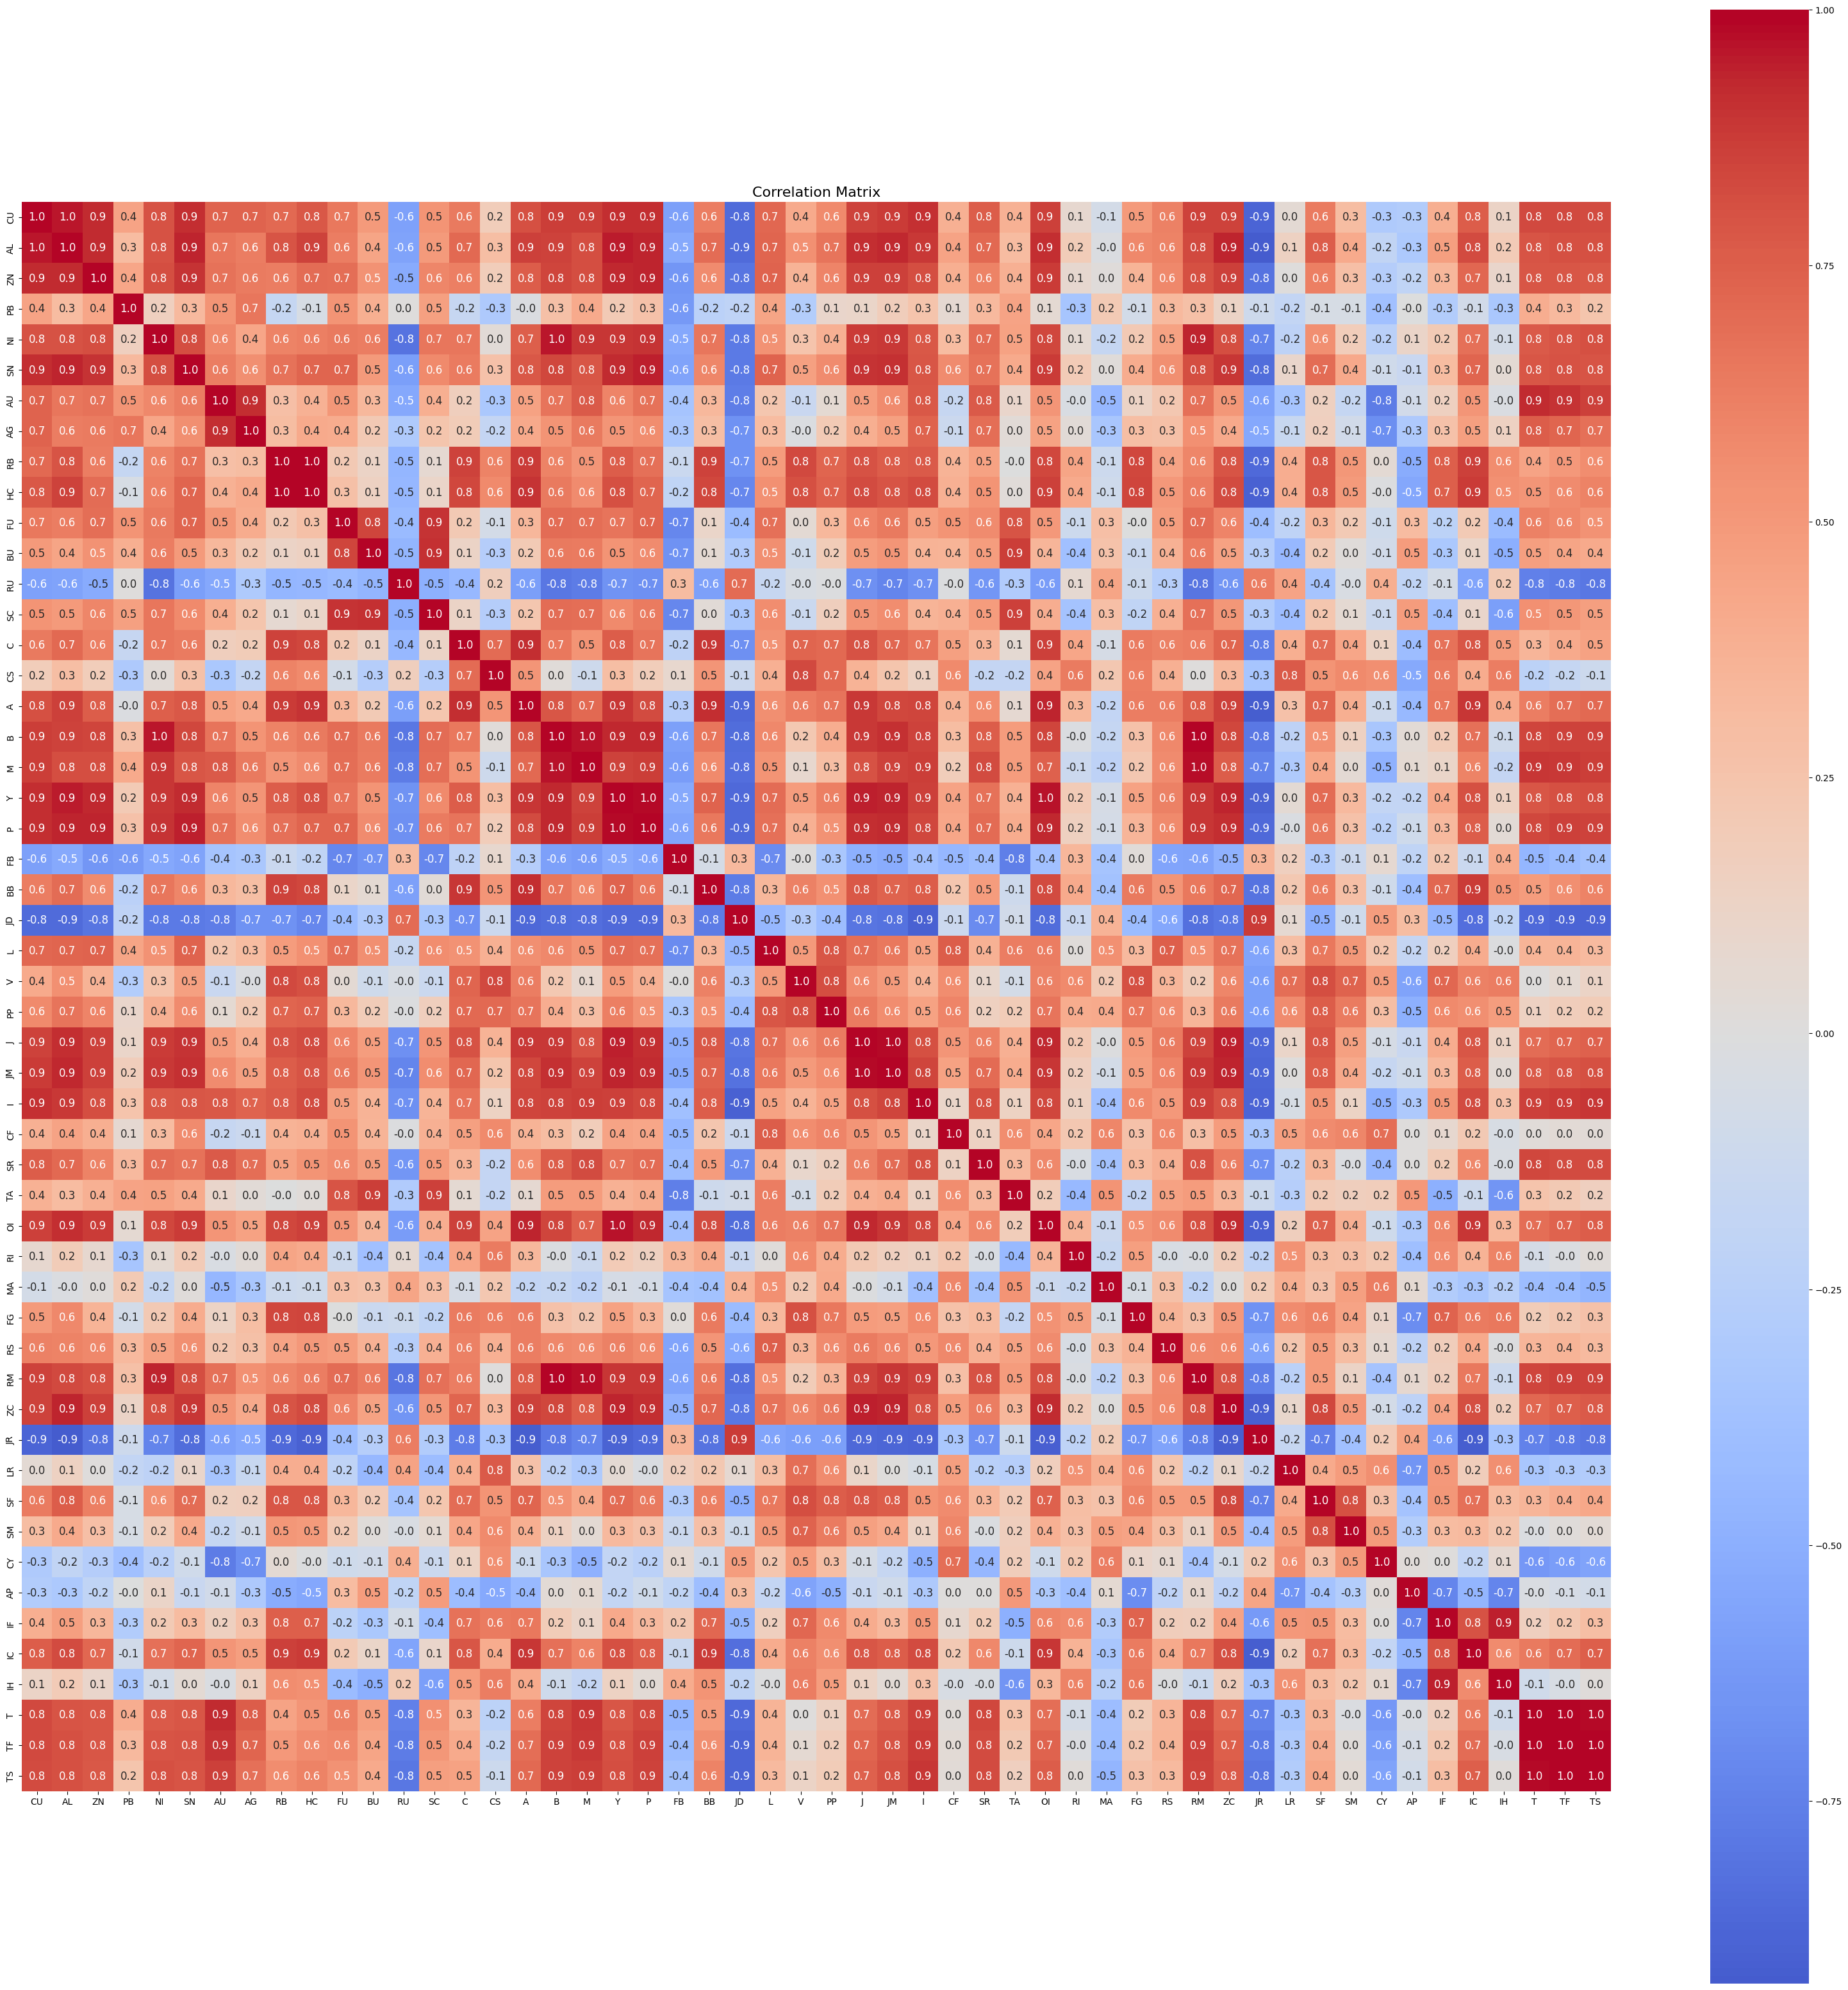

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate correlation matrix
correlation = filter_price_df.dropna().corr()

# Rank the correlation data
# 将相关系数矩阵转换为一维数组
corr_values = correlation.unstack()
# 按绝对值大小降序排序
corr_ranked = corr_values.abs().sort_values(ascending=False)
# 去除自身与自身的相关性（对角线元素）
corr_ranked = corr_ranked[corr_ranked.index.get_level_values(0) != corr_ranked.index.get_level_values(1)]

# Plot correlation matrix
plt.figure(figsize=(40, 40))
# 调整字体大小
sns.heatmap(correlation, annot=True, cmap="coolwarm", center=0, fmt=".1f", square=True, annot_kws={"size": 12})
plt.title("Correlation Matrix", fontsize=16)
# 添加颜色条标签
plt.colorbar().set_label("Correlation Coefficient", fontsize=14)
plt.tight_layout()
plt.show()